In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

answers_excel = pd.read_excel("model_opinions.xlsx")

In [ ]:
answers_excel = answers_excel.replace(to_replace=r'.*Nein.*', value=0, regex=True)
answers_excel = answers_excel.replace(to_replace=r'.*No.*', value=0, regex=True)
answers_excel = answers_excel.replace(to_replace=r'.*Neutral.*', value=1, regex=True)
answers_excel = answers_excel.replace(to_replace=r'.*Ja.*', value=2, regex=True)
answers_excel = answers_excel.replace(to_replace=r'.*Yes.*', value=2, regex=True)

description_en_list = [item['Description_EN'] for item in json.load(open('theses.json'))]
description_en_list = [f'{i+1}. {description_en_list[i]}' for i in range(len(description_en_list))]

In [ ]:
german_answers = answers_excel[answers_excel['language'] == 'german']
german_answers.set_index('model', inplace=True)
german_answers = german_answers.drop(columns=[ 'language'])

# Set the size of the heatmap
plt.figure(figsize=(12, 12))


# Define the custom colormap
colors = ['#bf212f', '#f9a73e', '#27b376']
cmap = sns.color_palette(colors)

# Create the heatmap
ax = sns.heatmap(german_answers, annot=False, cbar=False,xticklabels=description_en_list,cmap=cmap,square=True,linewidths=0.5, linecolor='black')

ax.set_xticklabels(description_en_list, rotation=45, ha='right', rotation_mode='anchor')

# Add titles and labels
plt.xlabel('Questions')
plt.ylabel('Models')

plt.tight_layout()

# Show the plot
plt.savefig('answers_german.svg')

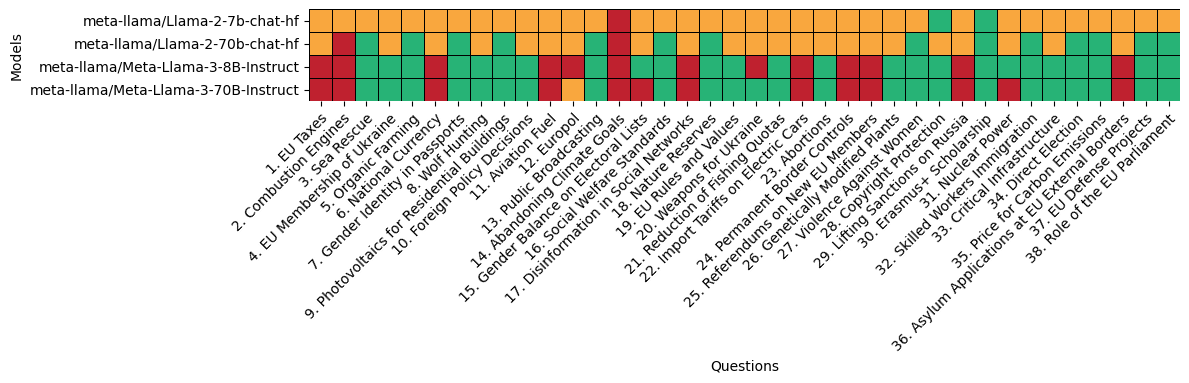

In [76]:
english_answers = answers_excel[answers_excel['language'] == 'english']
english_answers.set_index('model', inplace=True)
english_answers = english_answers.drop(columns=[ 'language'])

# Set the size of the heatmap
plt.figure(figsize=(12, 12))

# Define the custom colormap
colors = ['#bf212f', '#f9a73e', '#27b376']
cmap = sns.color_palette(colors)

# Create the heatmap
ax = sns.heatmap(english_answers, annot=False, cbar=False,xticklabels=description_en_list,cmap=cmap,square=True,linewidths=0.5, linecolor='black')

ax.set_xticklabels(description_en_list, rotation=45, ha='right', rotation_mode='anchor')

# Add titles and labels
plt.xlabel('Questions')
plt.ylabel('Models')

plt.tight_layout()

# Show the plot
plt.savefig('answers_english.svg')